In [25]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#this function remove missing values and convert data column into datatime 
def dataCleaning(df):
    # Drop rows where both TMAX and TMIN are missing
    df = df.dropna(subset=['TMAX', 'TMIN'], how='all')
        # Convert 'DATE' to datetime format
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

    # Drop rows where 'DATE' couldn't be converted
    df = df.dropna(subset=['DATE'])

    # Now you can safely extract month and year
    df['month'] = df['DATE'].dt.month
    df['year'] = df['DATE'].dt.year


    return df


In [31]:
#this function is used to cal statistics
def cal_statistics(df):
    mean_temp=np.mean(df['TMAX'])
    max_temp=df['TMAX'].max()
    min_temp=df['TMIN'].min()
    hottest = df[df['TMAX'] == max_temp]
    coolest=df[df['TMIN']==min_temp]
    rainy_days=df[df['PRCP']>0]
    hottest_day = df.loc[df['TMAX'].idxmax()]
    coolest_day = df.loc[df['TMIN'].idxmin()]
    print(f"Hottest Day: {hottest_day['DATE'].date()} 🌞")
    print(f"Temperature: {hottest_day['TMAX']}°C\n")
    print(f"Coolest Day: {coolest_day['DATE'].date()} ❄️")
    print(f"Temperature: {coolest_day['TMIN']}°C")
    print('Mean temperature:' ,mean_temp,'°C')
    print('Minimum temperature:' ,min_temp,'°C')
    print('Maximum temperature:' ,max_temp,'°C')


In [32]:
def ploting_graph(df):
    #Grouping_filtering
    monthly_avg=df.groupby('month')[['TMIN','TMAX','TAVG']].mean()
    monthly_rainfall=df.groupby('month')['PRCP'].sum()
    yearly_avg = df.groupby('year')['TAVG'].mean().reset_index()

    print('Monthly Average Temperatures (°C)')
    print(monthly_avg)

    print('Monthly Rainfall (mm)')
    print(monthly_rainfall)
    #graphs
    sns.lineplot(y=df['TMIN'],x=df['year'],marker='o')
    plt.title('minimum Temperature Trend by Year')
    plt.xlabel('Year')
    plt.ylabel('Minimum Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    sns.lineplot(data=df,y='TMAX',x='year',marker='o')
    plt.title('maximun Temperature Trend by Year',)
    plt.xlabel('Year')
    plt.ylabel('Maximum Temperature (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    sns.lineplot(data=yearly_avg, x='year', y='TAVG', marker='o' ,color='orange')
    plt.title('Average Annual Temperature in Delhi')
    plt.xlabel('Year')
    plt.ylabel('TAVG (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    sns.scatterplot(data=df,y='PRCP',x='TAVG')
    plt.title('Rainfall trend by month')
    plt.xlabel('Average temperature')
    plt.ylabel('Rainfall')
    plt.tight_layout()
    plt.show()

    monthly_rainfall.plot(kind='bar')
    plt.title('Rainfall trend over months')
    plt.xlabel('Month')
    plt.ylabel('Rainfall')
    plt.tight_layout()
    plt.show()
     

In [33]:
def main():
    #load the data
    df = pd.read_csv('weather.csv')

    df=dataCleaning(df)
    cal_statistics(df)
    ploting_graph(df)
  

C:\Users\Asus\AppData\Local\Temp\ipykernel_19016\2957293301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


Hottest Day: 2024-05-30 🌞
Temperature: 46.8°C

Coolest Day: 2021-01-01 ❄️
Temperature: 1.1°C
Mean temperature: 32.632372322899506 °C
Minimum temperature: 1.1 °C
Maximum temperature: 46.8 °C
Monthly Average Temperatures (°C)
            TMIN       TMAX       TAVG
month                                 
1       6.814815  19.716484  12.670548
2      10.007874  25.928205  17.991729
3      15.636429  31.749425  23.588000
4      20.144361  37.915464  28.878322
5      24.183459  40.070476  31.874497
6      26.916541  40.113131  33.410135
7      26.716923  36.639806  31.195918
8      26.289130  35.566964  30.703289
9      25.063433  35.350000  29.928378
10     19.071918  33.809244  26.201974
11     12.412587  28.892523  19.614685
12      7.650725  23.907759  14.556463
Monthly Rainfall (mm)
month
1      214.0
2       67.1
3      227.1
4       46.0
5      305.0
6      448.9
7     1284.2
8      772.9
9      477.2
10     226.6
11      10.2
12     172.2
Name: PRCP, dtype: float64


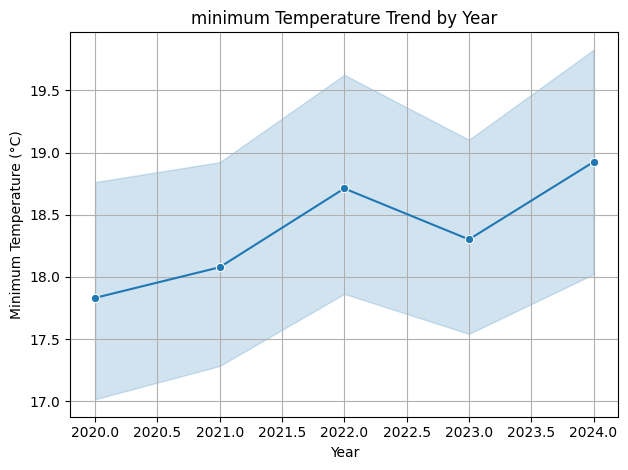

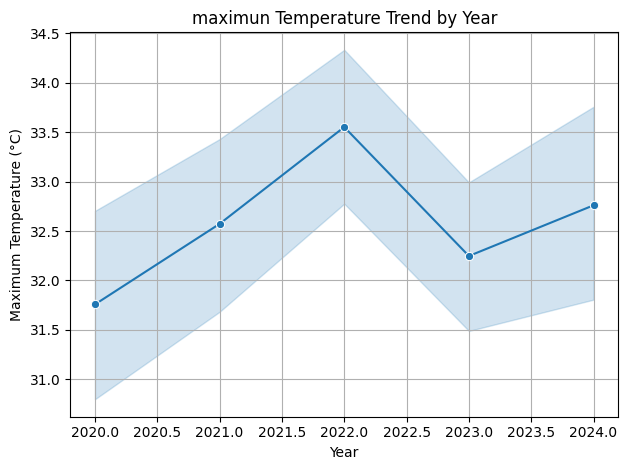

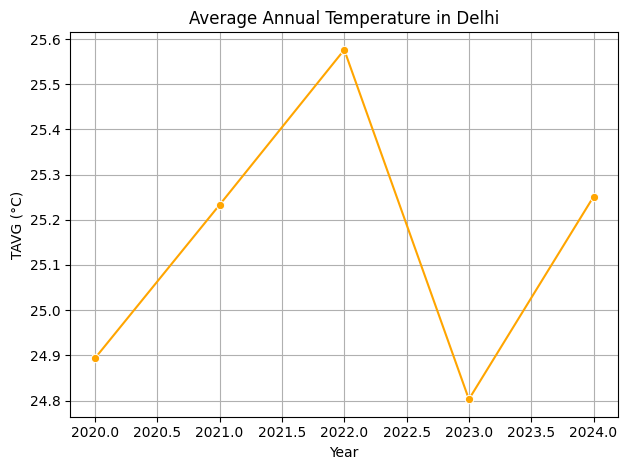

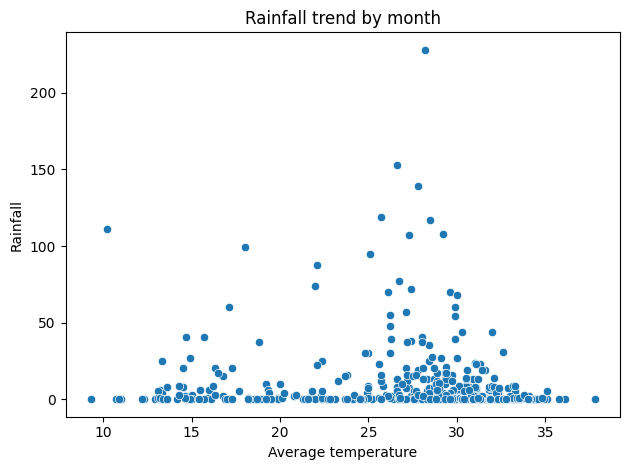

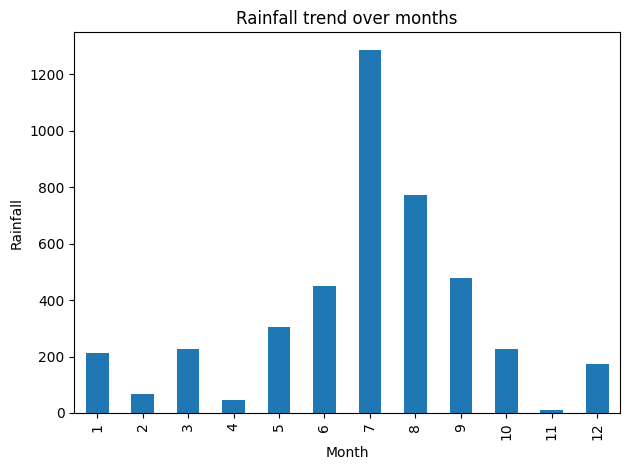

In [34]:
main()
